practice 

In [327]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [328]:
df = pd.read_csv("c:\\Users\\RAJA\\Downloads\\HR_comma_sep (1).csv")
df.head(50)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [329]:
df.drop(columns=['salary','Department'],inplace=False)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0
14995,0.37,0.48,2,160,3,0,1,0
14996,0.37,0.53,2,143,3,0,1,0
14997,0.11,0.96,6,280,4,0,1,0


In [330]:
df.shape

(14999, 10)

In [331]:
left = df[df.left==1]
left.shape


(3571, 10)

In [332]:
retained = df[df.left==0]
retained.shape

(11428, 10)

In [333]:
df.groupby('left').mean()

TypeError: agg function failed [how->mean,dtype->object]

terms which effect are satisfaction_level,average_montly_hours,	promotion_last_5years

<Axes: xlabel='salary', ylabel='count'>

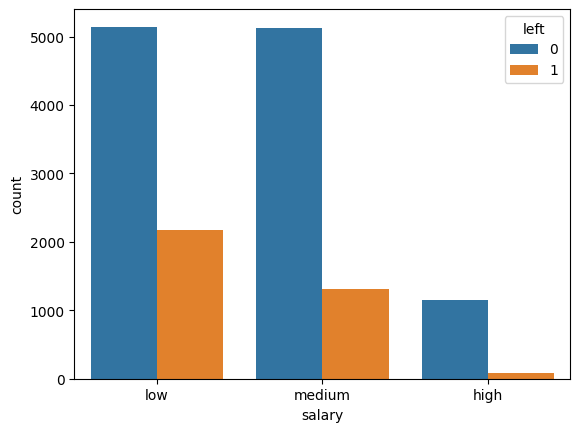

In [234]:
sns.countplot(x='salary', hue='left', data=df)

<Axes: xlabel='left', ylabel='count'>

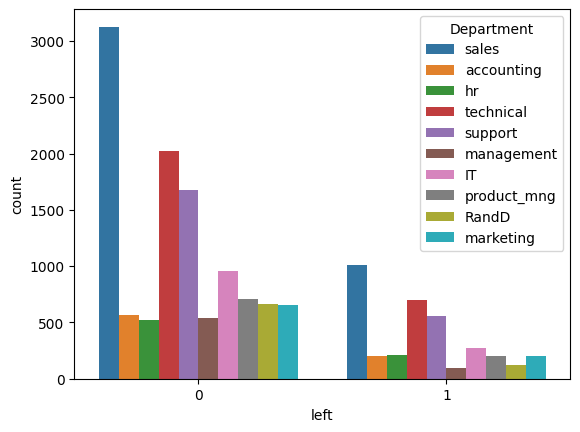

In [236]:
sns.countplot(x='left', hue='Department', data=df)

In [237]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [298]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()


,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [344]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary')
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [345]:
df_with_dummies.drop(['salary' , 'salary_high'], axis=1, inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,True,False
1,0.80,262,0,False,True
2,0.11,272,0,False,True
3,0.72,223,0,True,False
4,0.37,159,0,True,False


In [346]:

X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium
0,0.38,157,0,True,False
1,0.80,262,0,False,True
2,0.11,272,0,False,True
3,0.72,223,0,True,False
4,0.37,159,0,True,False


In [347]:
y = df.left

In [364]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [365]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [366]:
model.fit(X_train, y_train)

LogisticRegression()

In [367]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [368]:
model.score(X_test,y_test)

0.7726666666666666